# Shrodinger Equation

## 1-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}\frac{\partial^2{\Psi(x, t)}}{\partial x^2} + U(x, t)\Psi(x, t)=i\hbar\frac{\partial\Psi(x, t)}{\partial t}
\end{equation}
$$

## 2-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi(x, y, t)}}{\partial x^2}+\frac{\partial^2{\Psi(x, y, t)}}{\partial y^2}) + U(x, y, t)\Psi(x, y, t)=i\hbar\frac{\partial\Psi(x, y, t)}{\partial t}
\end{equation}
$$

## 3-d Shrodinger Equation
$$
\begin{equation}
-\frac{\hbar^2}{2\mu}(\frac{\partial^2{\Psi}}{\partial x^2}+\frac{\partial^2{\Psi}}{\partial y^2}+\frac{\partial^2{\Psi}}{\partial z^2}) + U(x, y, z, t)\Psi=i\hbar\frac{\partial\Psi}{\partial t}
\end{equation}
$$

## Infinite Potential Well(1d)

### potential energy
$$
\begin{equation}
    V(x) = 
    \left\{
        \begin{array}{cc}
            0, & -\frac{L}{2} < x < \frac{L}{2}, \\ 
            \infin, & otherwise,
        \end{array}
    \right.
\end{equation}
$$
where $L$ is the length of the box, the location of the center of the box is 0 and $x$ is the position of the particle.

### Def PDE of Shrodinger Equation in a infinite potential well

$$
\begin{equation}
    \left\{
        \begin{array}{cc}
        i\hbar\frac{\partial\Psi(x, t)}{\partial t}+\frac{\hbar^2}{2}\frac{\partial^2\Psi(x, t)}{\partial x^2}=0 \\ \\
        \Psi(x, 0) = Asin(k_n(x+\frac{L}{2})) \\ \\
        \Psi(-\frac{L}{2}, t)=0 \\ \\
        \Psi(\frac{L}{2}, t)=0 \\ \\
        \end{array}
    \right.
    , -\frac{L}{2} < x < \frac{L}{2}
\end{equation}
$$
where $k_n=\frac{n\pi}{L}$, $n$ is a positive integer, and $|A|=\sqrt{\frac{2}{L}}$

### Finite Difference

$$
\begin{equation}
    \begin{array}{cc}
        \begin{split}
            \frac{\partial\Psi}{\partial t} 
            &= \frac{i}{2}\frac{\partial^2\Psi}{\partial x^2} \\
            &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
        \end{split}
    \end{array}
\end{equation}
$$

obtain,
$$
\begin{equation}
    \frac{\Psi_j^{n+1}-\Psi_j^n}{\Delta t} = \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$
where $\Psi_j^{n}$ is the wave function value at j-th point when time equal to $n\Delta t$

then,
$$
\begin{equation}
    \Psi_j^{n+1} 
    = \Psi_j^n+\frac{i\Delta t}{2} \frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2}
\end{equation}
$$

matrix

$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        -2&1&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&1&-2 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

because $\Psi(-\frac{L}{2}, t)=0$ and $\Psi(\frac{L}{2}, t)=0$

obtain
$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{i\Delta t}{2\Delta x^2} 
    \left[
        \begin{array}{cc}
        0&0&0&0&\cdots&0&0&0 \\
        1&-2&1&0&\cdots&0&0&0 \\
        0&1&-2&1&\cdots&0&0&0 \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
        0&0&0&0&\cdots&1&-2&1 \\
        0&0&0&0&\cdots&0&0&0 \\
        \end{array}
    \right]
    \left[
        \begin{array}{cc}
        \Psi^n_1 \\
        \Psi^n_2 \\
        \Psi^n_3 \\
        \vdots \\
        \vdots \\
        \Psi^n_{J-1} \\
        \Psi^n_J \\
        \end{array}
    \right]
\end{equation}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Finite Difference

# state num
state_num = 1
# box length
box_l = 2
# cal time
time_total = 2
# time step
delta_time = 0.00001
# space step
delta_x = 0.1
# time discrete num
time_n = int(time_total/delta_time)
# space discrete num
space_n = int(box_l/delta_x)

# result matrix space_point * time_point
phi_matrix = np.zeros((int(space_n), int(time_n))).astype(np.complex64)
# def A matrix
parm_matrix = -2*np.eye(int(space_n)) + np.eye(int(space_n), k=1) + np.eye(int(space_n), k=-1) + 0.j
parm_matrix[0, :] = 0
parm_matrix[-1, :] = 0

# init wave
phi_matrix[:, 0] = np.sin((state_num*np.pi/box_l)*(np.linspace(-box_l/2, box_l/2, space_n)+box_l/2))

In [81]:
# iter
constant_ = 1.j*delta_time/(2*np.power(delta_x, 2))
for i in range(time_n-1):
    temp_value = phi_matrix[:, i] + constant_ * np.matmul(parm_matrix, phi_matrix[:, i])
    phi_matrix[:, i+1] = temp_value
print("done...")

done...


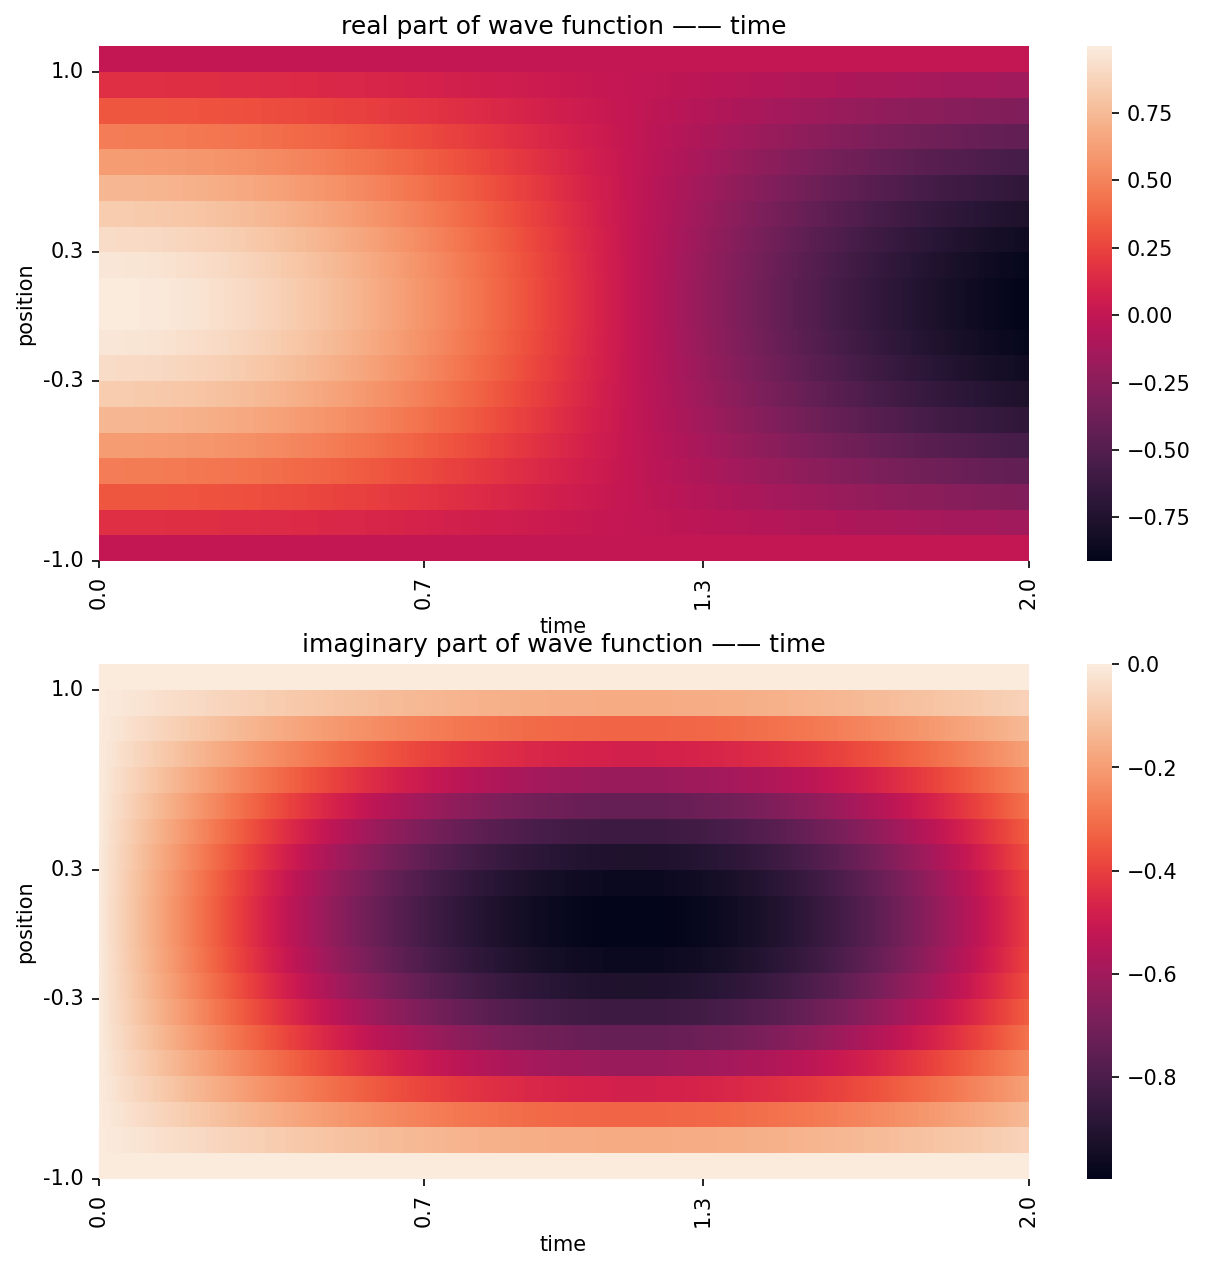

In [82]:
# plot
plt.figure(figsize=(10, 10), dpi=150)
time_list = np.linspace(0, time_total, time_n)
position_list = np.linspace(-box_l/2, box_l/2, space_n)

position_labels = np.around(np.linspace(-box_l/2, box_l/2, 4), 1)
# the index position of the tick labels
position_ticks = list()
for label in position_labels:
    idx_pos = len(position_list) - np.argmin(np.abs(label-position_list))
    position_ticks.append(idx_pos)

time_labels = np.around(np.linspace(0, time_total, 4), 1)
time_ticks = list()
for label in time_labels:
    idx_pos = np.argmin(np.abs(label-time_list))
    time_ticks.append(idx_pos)

# real
plt.subplot(2, 1, 1)
ax = sns.heatmap(np.real(phi_matrix), annot=False)
ax.set_xlabel("time")
ax.set_ylabel("position")
ax.set_yticks(position_ticks)
ax.set_xticks(time_ticks)
ax.set_title("real part of wave function —— time")
ax.set_xticklabels(time_labels)
ax.set_yticklabels(position_labels)

# imag
plt.subplot(2, 1, 2)
ax_imag = sns.heatmap(np.imag(phi_matrix), annot=False)
ax_imag.set_xlabel("time")
ax_imag.set_ylabel("position")
ax_imag.set_yticks(position_ticks)
ax_imag.set_xticks(time_ticks)
ax_imag.set_title("imaginary part of wave function —— time")
ax_imag.set_xticklabels(time_labels)
ax_imag.set_yticklabels(position_labels)

plt.show()

## Finite Difference Runge-Kutta Method

Obviously, the accuracy of finite difference is not enough, and consider to use Runge-Kutta method

### Fourth Runge-Kutta Method

$$
\begin{equation}
    \left\{
        \begin{array}{cc}
            y^{n+1} = y^n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \\ \\ 
            k_1 = f(y^n, t^n) \\ \\
            k_2 = f(y^n+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\ \\
            k_3 = f(y^n+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\ \\
            k_4 = f(y^n+hk_3, t^n+h)
        \end{array}
    \right.
\end{equation}
$$

### Finite difference with Fourth Runge-Kutta Method

$$
\begin{equation}
    \begin{split}
        \frac{\partial\Psi}{\partial t} 
        &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2} \\
        &= f(\Psi, t)
    \end{split}
\end{equation}
$$

obtain
$$
\begin{equation}
    \left\{
        \begin{array}{cc}
            \begin{split}
            \Psi^{n+1}_j &= \Psi^n_j + \Delta t k \\ &= \Psi^n_j + \frac{h}{6}(k_1+2k_2+2k_3+k_4) 
            \end{split}
            \\ \\
            h = \Delta t 
            \\ \\
            \begin{split}
            k_{1j} &= f(\Psi^n_j, t^n)\\ &= \frac{i}{2}\frac{\Psi_{j+1}^n-2\Psi_j^n+\Psi_{j-1}^n}{\Delta x^2} 
            \end{split}
            \\ \\
            \begin{split}
            k_{2j} &= f(\Psi^n_j+k_{1j}\frac{h}{2}, t^n+\frac{h}{2})\\ &= \frac{i}{2}\frac{\Psi_{j+1+k_1\frac{h}{2}}^{n+\frac{h}{2}}-2\Psi_{j+k_1\frac{h}{2}}^{n+\frac{h}{2}}+\Psi_{j-1+k_1\frac{h}{2}}^{n+\frac{h}{2}}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+\frac{h}{2}k_{1(j+1)}-2\Psi_{j}^{n}-hk_{1j}+\Psi_{j-1}^{n}+\frac{h}{2}k_{1(j-1)}}{\Delta x^2}
            \end{split} 
            \\ \\
            \begin{split}
            k_{3j} &= f(\Psi^n_j+k_{2j}\frac{h}{2}, t^n+\frac{h}{2})\\ &= \frac{i}{2}\frac{\Psi_{j+1+k_2\frac{h}{2}}^{n+\frac{h}{2}}-2\Psi_{j+k_2\frac{h}{2}}^{n+\frac{h}{2}}+\Psi_{j-1+k_2\frac{h}{2}}^{n+\frac{h}{2}}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+\frac{h}{2}k_{2(j+1)}-2\Psi_{j}^{n}-hk_{2j}+\Psi_{j-1}^{n}+\frac{h}{2}k_{2(j-1)}}{\Delta x^2}
            \end{split}
            \\ \\
            \begin{split}
            k_{4j} &= f(\Psi^n_j+hk_{3j}, t^n+h)\\ &= \frac{i}{2}\frac{\Psi_{j+1+hk_3}^{n+h}-2\Psi_{j+hk_3}^{n+h}+\Psi_{j-1+hk_3}^{n+h}}{\Delta x^2}\\ &= \frac{i}{2}\frac{\Psi_{j+1}^{n}+hk_{3(j+1)}-2\Psi_{j}^{n}-2hk_{3j}+\Psi_{j-1}^{n}+hk_{3(j-1)}}{\Delta x^2}
            \end{split}
        \end{array}
    \right.
\end{equation}
$$

matrix
$$
\begin{equation}
    \begin{array}{cc}
        \begin{split}
            \bm{k_1^n} 
            &= 
            \left[ 
                \begin{array}{cc}
                    f(\Psi^n_1, t^n) \\
                    f(\Psi^n_2, t^n) \\
                    \vdots \\
                    f(\Psi^n_J, t^n) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2} 
            \left[
                \begin{array}{cc}
                -2&1&0&0&\cdots&0&0&0 \\
                1&-2&1&0&\cdots&0&0&0 \\
                0&1&-2&1&\cdots&0&0&0 \\
                \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                0&0&0&0&\cdots&1&-2&1 \\
                0&0&0&0&\cdots&0&1&-2 \\
                \end{array}
            \right]
            \left[
                \begin{array}{cc}
                \Psi^n_1 \\
                \Psi^n_2 \\
                \Psi^n_3 \\
                \vdots \\
                \vdots \\
                \Psi^n_{J-1} \\
                \Psi^n_J \\
                \end{array}
            \right]
        \end{split}
    \end{array}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_2^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                f(\Psi^n_2+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                \vdots \\
                f(\Psi^n_J+k_1\frac{h}{2}, t^n+\frac{h}{2}) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + \frac{h}{2}\bm{k_1^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_3^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                f(\Psi^n_2+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                \vdots \\
                f(\Psi^n_J+k_2\frac{h}{2}, t^n+\frac{h}{2}) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + \frac{h}{2}\bm{k_2^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
            \bm{k_4^n}
            &= 
            \left[
                \begin{array}{cc}
                f(\Psi^n_1+hk_3, t^n+h) \\
                f(\Psi^n_2+hk_3, t^n+h) \\
                \vdots \\
                f(\Psi^n_J+hk_3, t^n+h) \\
                \end{array}
            \right] \\
            &= 
            \frac{i}{2\Delta x^2}
                \left[
                    \begin{array}{cc}
                    -2&1&0&0&\cdots&0&0&0 \\
                    1&-2&1&0&\cdots&0&0&0 \\
                    0&1&-2&1&\cdots&0&0&0 \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    \vdots&\ddots&\ddots&\ddots&\ddots&\ddots&\ddots&\vdots \\
                    0&0&0&0&\cdots&1&-2&1 \\
                    0&0&0&0&\cdots&0&1&-2 \\
                    \end{array}
                \right]
                \left(
                \left[
                    \begin{array}{cc}
                    \Psi^n_1 \\
                    \Psi^n_2 \\
                    \Psi^n_3 \\
                    \vdots \\
                    \vdots \\
                    \Psi^n_{J-1} \\
                    \Psi^n_J \\
                    \end{array}
                \right] + h\bm{k_3^n}
                \right)
        \end{split}
\end{equation}
$$

$$
\begin{equation}
    \bm{\Psi^{n+1}} = \bm{\Psi^n} + \frac{h}{6}(\bm{k_1^n}+2\bm{k_2^n}+2\bm{k_3^n}+\bm{k_4^n})
\end{equation}
$$

In [2]:
# Finite Difference with Fourth Lunge-Kutta Method

# state num
state_num = 2
# box length
box_l = 2
# cal time
time_total = 2
# time step
delta_time = 2e-5
# space step
delta_x = 1e-2
# time discrete num
time_n = int(time_total/delta_time)
# space discrete num
space_n = int(box_l/delta_x)

# result matrix space_point * time_point
phi_matrix = np.zeros((int(space_n), int(time_n))).astype(np.complex64)

# def A matrix
parm_matrix = -2*np.eye(int(space_n)) + np.eye(int(space_n), k=1) + np.eye(int(space_n), k=-1) + 0.j
parm_matrix[0, :] = 0
parm_matrix[-1, :] = 0

# def k1, k2, k3, k4
# k1 = k_vector_matrix[:, 0]
# k2 = k_vector_matrix[:, 1]
# k3 = k_vector_matrix[:, 2]
# k4 = k_vector_matrix[:, 3]
k_vector_matrix = np.zeros((int(space_n), 4)).astype(np.complex64)

# init wave
phi_matrix[:, 0] = np.sin((state_num*np.pi/box_l)*(np.linspace(-box_l/2, box_l/2, space_n)+box_l/2))

In [3]:
# iter
constant_ = 1.j/(2*np.power(delta_x, 2))
for i in range(time_n-1):
    # k1
    k_vector_matrix[:, 0] = constant_ * np.matmul(parm_matrix, phi_matrix[:, i])
    # k2
    k_vector_matrix[:, 1] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time/2)*k_vector_matrix[:, 0]))
    # k3
    k_vector_matrix[:, 2] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time/2)*k_vector_matrix[:, 1]))
    # k4
    k_vector_matrix[:, 3] = constant_ * (np.matmul(parm_matrix, phi_matrix[:, i]+(delta_time)*k_vector_matrix[:, 2]))
    # if i % 1000 == 0:
    #     print(np.max(k_vector_matrix))
    phi_matrix[:, i+1] = phi_matrix[:, i] + (delta_time/6)*(k_vector_matrix[:, 0] + 2*k_vector_matrix[:, 1] + 2*k_vector_matrix[:, 2] + k_vector_matrix[:, 3])
print("done...") 

done...


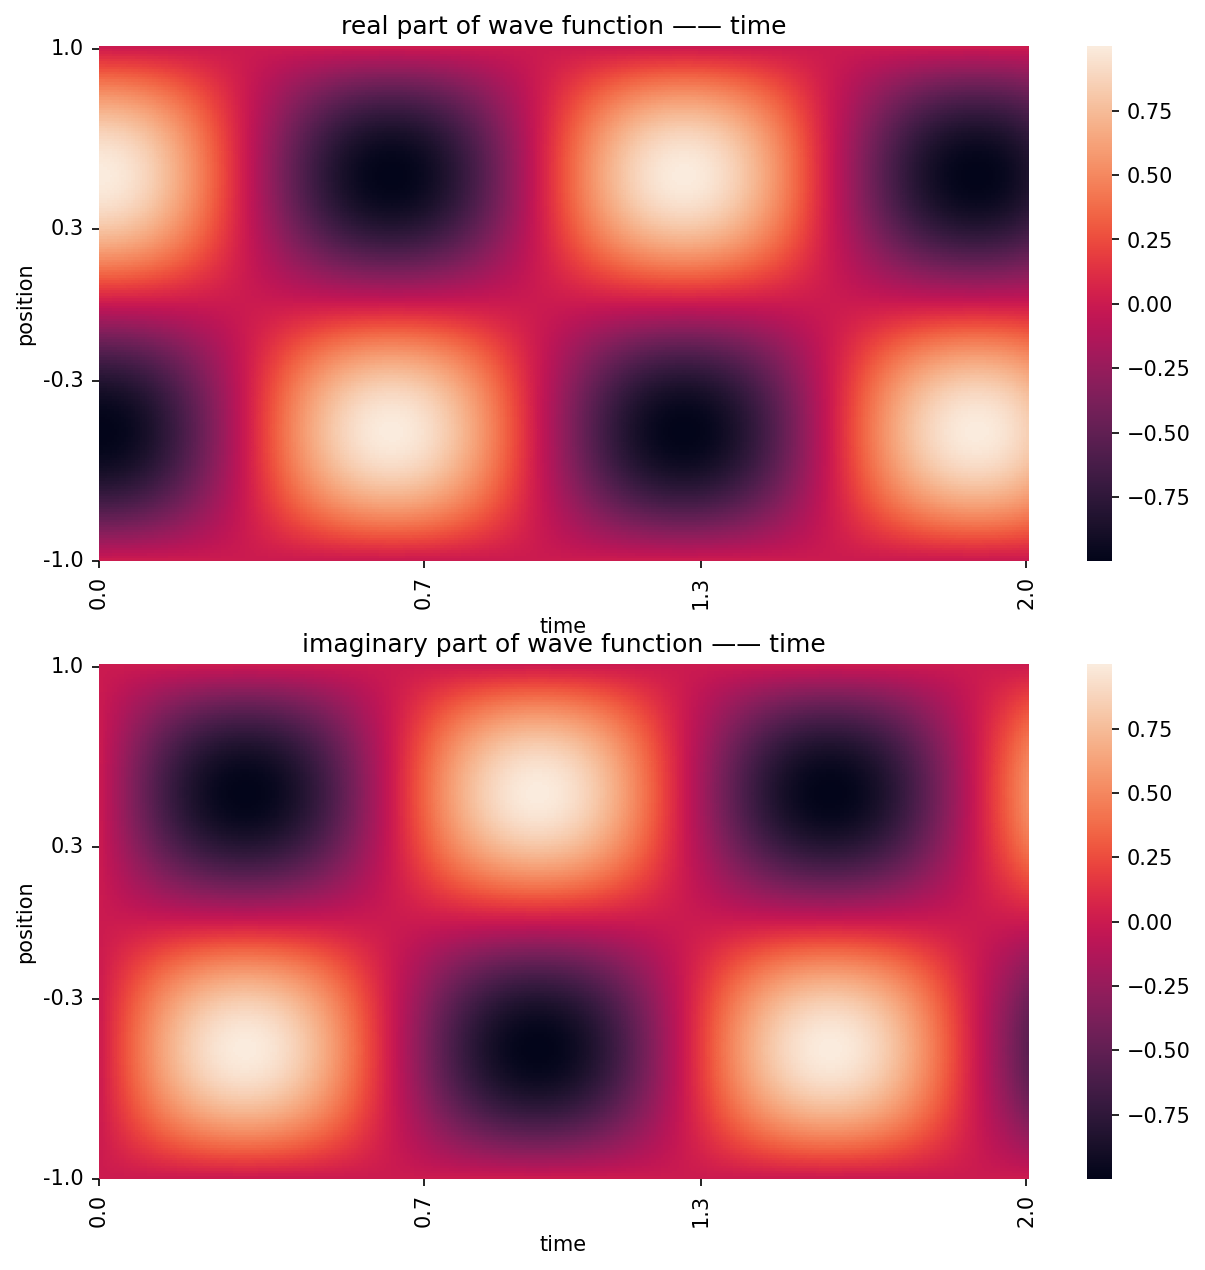

In [11]:
# plot

plt.figure(figsize=(10, 10), dpi=150)

draw_time_list = np.linspace(0, time_n-1, min(400, time_n)).astype(np.int32)
draw_position_list = np.linspace(0, space_n-1, min(400, space_n)).astype(np.int32)
phi_matrix_draw = phi_matrix[draw_position_list, :][:, draw_time_list]

time_list = np.linspace(0, time_total, len(draw_time_list))
position_list = np.linspace(-box_l/2, box_l/2, len(draw_position_list))

position_labels = np.around(np.linspace(-box_l/2, box_l/2, 4), 1)
# the index position of the tick labels
position_ticks = list()
for label in position_labels:
    idx_pos = len(position_list) - np.argmin(np.abs(label-position_list))
    position_ticks.append(idx_pos)

time_labels = np.around(np.linspace(0, time_total, 4), 1)
time_ticks = list()
for label in time_labels:
    idx_pos = np.argmin(np.abs(label-time_list))
    time_ticks.append(idx_pos)

# real
plt.subplot(2, 1, 1)
ax = sns.heatmap(np.real(phi_matrix_draw), annot=False)
ax.set_xlabel("time")
ax.set_ylabel("position")
ax.set_yticks(position_ticks)
ax.set_xticks(time_ticks)
ax.set_title("real part of wave function —— time")
ax.set_xticklabels(time_labels)
ax.set_yticklabels(position_labels)

# imag
plt.subplot(2, 1, 2)
ax_imag = sns.heatmap(np.imag(phi_matrix_draw), annot=False)
ax_imag.set_xlabel("time")
ax_imag.set_ylabel("position")
ax_imag.set_yticks(position_ticks)
ax_imag.set_xticks(time_ticks)
ax_imag.set_title("imaginary part of wave function —— time")
ax_imag.set_xticklabels(time_labels)
ax_imag.set_yticklabels(position_labels)

plt.show()

## PINN
Using PINN to solve the Shrodinger Equation in a infinite potential well

### model

* #### Inputs
position $x_i$, and time $t_i$
* #### output
the wave function value $u$ at $(x_i, t_i)$
* #### Conditions
    * **PDE**
    $$
    \begin{equation}
    f(x, t) = i \frac{\partial{u}}{\partial{t}} + 2\frac{\partial^2{u}}{\partial{x}^2} = 0, \\ -\frac{L}{2}\leq x \leq \frac{L}{2} 
    \end{equation}
    $$
    * **Boundary Conditions**
    $$
    \begin{equation}
        \begin{array}{cc}
            u(-\frac{L}{2}, t)=0 \\
            u(\frac{L}{2}, t)=0 
        \end{array}
    \end{equation}
    $$
    * **Initial Conditions**
    $$
    \begin{equation}
        \begin{array}{cc}
            u(x, 0) = Asin(k_n(x+\frac{L}{2})) \\
            k_n = \frac{n\pi}{L} \\
            |A|=\sqrt{\frac{2}{L}}
        \end{array}
    \end{equation}
    $$
* #### Loss Function
$$
\begin{equation}
    \begin{array}{cc}
        \mathcal{L}=MSE_b+MSE_0+MSE_f, \\ \\
        MSE_b = \frac{1}{|N_b|}\sum_{i=1}^{|N_b|}(|u(-\frac{L}{2}, t^i_b)|^2+|u(\frac{L}{2}, t^i_b)|^2), \\ \\
        MSE_0 = \frac{1}{|N_0|}\sum_{i=1}^{|N_0|} |u(x_0^i, 0)-u_0^i|^2, \\ \\
        MSE_f = \frac{1}{|N_f|}\sum_{i=1}^{|N_f|} |f(x_f^i, t_f^i)|^2
    \end{array}
\end{equation}
$$
where 
$N_f = \{ (x_f^1, t_f^1), (x_f^2, t_f^2), \cdots, (x_f^{|N_f|}, t_f^{|N_f|}) \}$ is the dataset to calculate the loss of PDE, 
$|N_f|$ is the total number of $N_f$, 
$N_0 = \{ (x_0^1, u_0^1), (x_0^2, u_0^2), \cdots, (x_0^{|N_0|}, u_0^{|N_0|}) \}$ denotes the initial data,
$|N_0|$ is the total number of $N_0$,  
$N_b=\{ t^1_b, t^2_b, \cdots, t^{|N_b|}_b \}$ corresponds to the collocation points on the boundary,
and $|N_b|$ is the total number of $N_b$,

* #### Optimization Method
In order to calculate the value of $f(x_f^i, t_f^i)$, we need to obtain the value of $\frac{\partial{u}}{\partial{t}}$ and $\frac{\partial^2{u}}{\partial{x}^2}$, which can not be obtained directly.
Consider to use Automatic Differentiation(AD) to obtain these two value, which is an important part of Gradient Descent.

* #### Other Info
    * ##### Self-Supervised Learning or Supervised Learning?
    There is no need to provide train data to train PINN model, and the numerical data is only used to calculate the accuracy of PINN outputs

In [55]:
def heatmap_draw_func(input_matrix, time_range, position_range):
    # plot

    time_n_raw = len(input_matrix[0, :])
    space_n_raw = len(input_matrix[:, 0])

    plt.figure(figsize=(10, 10), dpi=150)

    draw_time_list = np.linspace(0, time_n_raw-1, min(400, time_n_raw)).astype(np.int32)
    draw_position_list = np.linspace(0, space_n_raw-1, min(400, space_n_raw)).astype(np.int32)
    phi_matrix_draw = input_matrix[draw_position_list, :][:, draw_time_list]

    time_list = np.linspace(time_range[0], time_range[1], len(draw_time_list))
    position_list = np.linspace(position_range[0], position_range[1], len(draw_position_list))

    position_labels = np.around(np.linspace(position_range[0], position_range[1], 4), 1)
    # the index position of the tick labels
    position_ticks = list()
    for label in position_labels:
        idx_pos = len(position_list) - np.argmin(np.abs(label-position_list))
        position_ticks.append(idx_pos)

    time_labels = np.around(np.linspace(time_range[0], time_range[1], 4), 1)
    time_ticks = list()
    for label in time_labels:
        idx_pos = np.argmin(np.abs(label-time_list))
        time_ticks.append(idx_pos)

    # real
    plt.subplot(2, 1, 1)
    ax = sns.heatmap(np.real(phi_matrix_draw), annot=False)
    ax.set_xlabel("time")
    ax.set_ylabel("position")
    ax.set_yticks(position_ticks)
    ax.set_xticks(time_ticks)
    ax.set_title("real part of wave function —— time")
    ax.set_xticklabels(time_labels)
    ax.set_yticklabels(position_labels)

    # imag
    plt.subplot(2, 1, 2)
    ax_imag = sns.heatmap(np.imag(phi_matrix_draw), annot=False)
    ax_imag.set_xlabel("time")
    ax_imag.set_ylabel("position")
    ax_imag.set_yticks(position_ticks)
    ax_imag.set_xticks(time_ticks)
    ax_imag.set_title("imaginary part of wave function —— time")
    ax_imag.set_xticklabels(time_labels)
    ax_imag.set_yticklabels(position_labels)

    plt.show()

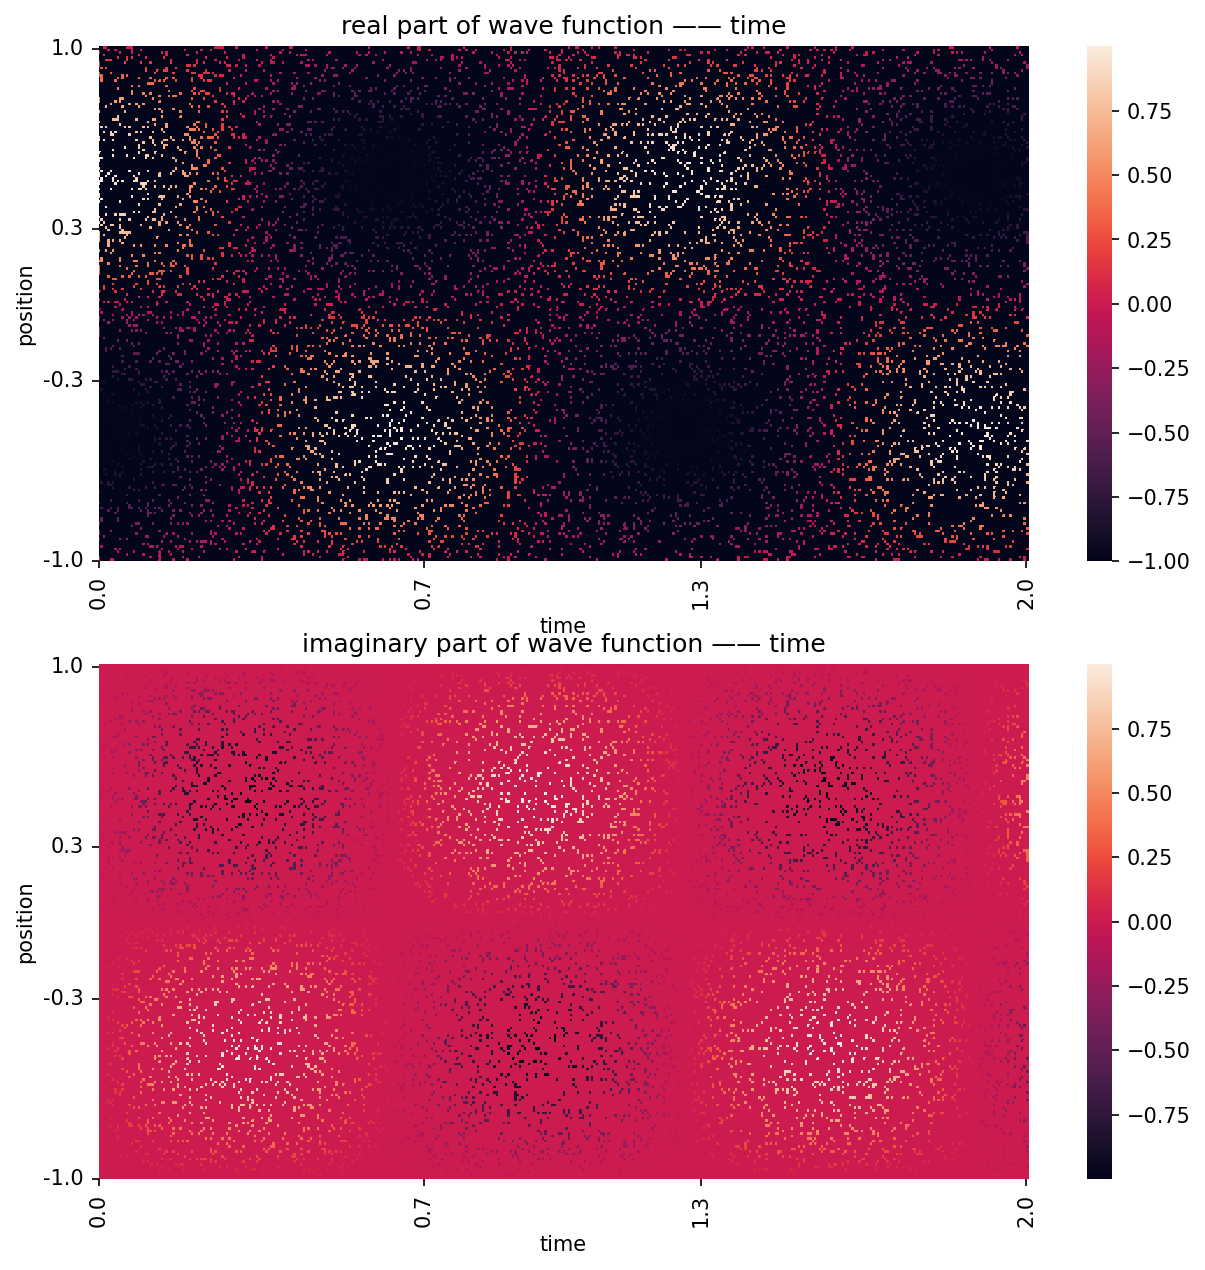

data create done...
the number of initial data:50
the number of boundary data:50
the number of f data:20000


In [92]:
# PINN

# data
# boundary_data, initial_data, f_data
# obtain from numerical method

# boundary data number
boundary_data_num = 50
# initial data number
initial_data_num = 50
# f data number
f_data_num = 2000000

# total num
total_initial_num = len(phi_matrix[:, 0])
total_boundary_num = len(phi_matrix[0, :]) * 2
total_f_num = np.prod(np.shape(phi_matrix))

# x and t data
time_list = np.linspace(0, time_total, len(phi_matrix[0, :]))
position_list = np.linspace(-box_l/2, box_l/2, len(phi_matrix[:, 0]))

# obtain the index of test data
import random
np.random.seed(1024)
random.seed(1024)

initial_data_index_list = np.random.choice(range(0, total_initial_num), initial_data_num, replace=False)
boundary_data_index_list = np.random.choice(range(0, total_boundary_num), boundary_data_num, replace=False)
f_data_index_list = np.random.choice(range(0, total_f_num), f_data_num, replace=False)

# obtain data
# (x, t, u)
initial_position = position_list[initial_data_index_list]
initial_time = np.zeros_like(initial_data_index_list)
initial_data = np.array(list(zip(initial_position, initial_time, phi_matrix[initial_data_index_list, 0])), dtype=np.complex64)

# boundary
boundary_position_loc_list = (boundary_data_index_list//len(time_list))*-1
boundary_time_loc_list = boundary_data_index_list%len(time_list)
boundary_position = position_list[boundary_position_loc_list]
boundary_time = time_list[boundary_time_loc_list]
boundary_data = np.array(list(zip(boundary_position, boundary_time, phi_matrix[boundary_position_loc_list, boundary_time_loc_list])), dtype=np.complex64)

# f
f_data_position_loc_list = f_data_index_list//len(time_list)
f_data_time_loc_list = f_data_index_list%len(time_list)
f_data_position = position_list[f_data_position_loc_list]
f_data_time = time_list[f_data_time_loc_list]
f_data = np.array(list(zip(f_data_position, f_data_time, phi_matrix[f_data_position_loc_list, f_data_time_loc_list])), dtype=np.complex64)

# draw test data
test_data_matrix = np.ones_like(phi_matrix).astype(np.complex64)*-1
test_data_matrix[initial_data_index_list, 0] = initial_data[:, 2]
test_data_matrix[boundary_position_loc_list, boundary_time_loc_list] = boundary_data[:, 2]
test_data_matrix[f_data_position_loc_list, f_data_time_loc_list] = f_data[:, 2]
heatmap_draw_func(test_data_matrix, [0, time_total], [-box_l/2, box_l/2])

f_data = f_data[:20000, :]
print("data create done...")
print("the number of initial data:{}".format(len(initial_data)))
print("the number of boundary data:{}".format(len(boundary_data)))
print("the number of f data:{}".format(len(f_data)))

In [1]:
from torch.utils.data import DataLoader, Dataset
import torch
from torch import nn
from collections import OrderedDict

In [96]:
# dataset and dataloader
class MyDataset(Dataset):

    def __init__(self, data_list) -> None:
        super(MyDataset, self).__init__()
        self.data_list = data_list
    
    def __getitem__(self, item):
        input_x = self.data_list[item][0]
        input_t = self.data_list[item][1]
        true_y_real = self.data_list[item][2]
        true_y_imag = self.data_list[item][3]

        return {"input_x": input_x, "input_t": input_t, "true_y": [true_y_real, true_y_imag]}

    def __len__(self):
        return len(self.data_list)
    
    @staticmethod
    def collate_fn(batch):
        input_tensor = torch.cat([torch.unsqueeze([s["input_x"], s["input_t"]], 0) for s in batch], dim=0).type(torch.float32)
        true_y = torch.as_tensor([s["true_y"] for s in batch])
        return {"input": input_tensor, "output": true_y}

In [98]:
# model
# input (x, t)
# output (pred_real, pred_imag, du/dt, d^2u/dx^2)

class PINN(nn.Module):

    def __init__(self):
        super(PINN, self).__init__()

        self.pinn_network = nn.Sequential(OrderedDict([
            ("layer 1", nn.Linear(2, 100)),
            ("tanh 1", nn.Tanh()),
            ("layer 2", nn.Linear(100, 100)),
            ("tanh 2", nn.Tanh()),
            ("layer 3", nn.Linear(100, 100)),
            ("tanh 3", nn.Tanh()),
            ("layer 4", nn.Linear(100, 100)),
            ("tanh 4", nn.Tanh()),
            ("output layer", nn.Linear(100, 2)),
        ]))
    
    def forward(self, x):

        return self.pinn_network(x)

In [15]:
bx = torch.tensor([[1., 2.], [3., 4.], [5., 6.]], requires_grad=True)
y = torch.cat((torch.unsqueeze(torch.pow(bx[:, 0], 2)+torch.pow(bx[:, 1], 2), dim=-1), 
              torch.unsqueeze(torch.pow(bx[:, 0], 3)+torch.pow(bx[:, 1], 3), dim=-1)), dim=-1)
print(y)
print(y.shape, bx.shape)

dydx_1 = torch.autograd.grad(y[:, 0], bx, grad_outputs=torch.ones(bx.shape[0]), create_graph=True, retain_graph=True)
dydx_2 = torch.autograd.grad(y[:, 1], bx, grad_outputs=torch.ones(bx.shape[0]), create_graph=True, retain_graph=True)
print(torch.unsqueeze(dydx_1[0][:, 0], dim=-1).shape)
print(dydx_2)
print(torch.cat((torch.unsqueeze(dydx_1[0][:, 0], dim=-1), torch.unsqueeze(dydx_2[0][:, 0], dim=-1)), dim=1).shape)
dy_2_dx_1 = torch.autograd.grad(dydx_2[0], bx, grad_outputs=torch.ones(bx.shape), create_graph=True, retain_graph=True)
print(dy_2_dx_1)

tensor([[  5.,   9.],
        [ 25.,  91.],
        [ 61., 341.]], grad_fn=<CatBackward>)
torch.Size([3, 2]) torch.Size([3, 2])
torch.Size([3, 1])
(tensor([[  3.,  12.],
        [ 27.,  48.],
        [ 75., 108.]], grad_fn=<AddBackward0>),)
torch.Size([3, 2])
(tensor([[ 6., 12.],
        [18., 24.],
        [30., 36.]], grad_fn=<AddBackward0>),)


In [99]:
# -------------- global params --------------
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

max_epochs = 100
recorder = dict()
recorder["acc"] = list()
recorder["loss"] = list()


# -------------- data --------------
# data set
boundary_dataset = MyDataset(boundary_data)
initial_dataset = MyDataset(initial_data)
f_dataset = MyDataset(f_data)

# data loader
boundary_dataloader = DataLoader(dataset=boundary_dataset, batch_size=boundary_data_num, shuffle=True, 
                                 collate_fn=boundary_dataset.collate_fn)
initial_dataloader = DataLoader(dataset=initial_dataset, batch_size=initial_data_num, shuffle=True, 
                                 collate_fn=initial_dataset.collate_fn)
f_data_dataloader = DataLoader(dataset=f_dataset, batch_size=f_data_num, shuffle=True, 
                                 collate_fn=f_dataset.collate_fn)

# -------------- model --------------
pinn_model = PINN().to(device)

# -------------- loss and optimizer --------------
params = [p for p in pinn_model.parameters() if p.requires_grad]
optimizer = torch.optim.LBFGS(params)
criterion = nn.MSELoss(reduction="mean")

In [ ]:

# train
for epoch in range(1, max_epochs+1):
    pinn_model.train()

    optimizer.zero_grad()

    # boundary data
    for step, batch in enumerate(boundary_dataloader):
        input_ = batch["input"].to(device)
        true_output = batch["output"].to(device)

        pred_ = pinn_model(input_)
        boundary_loss = criterion(pred_, torch.zeros_like(pred_).to(device))


    # initial data
    for step, batch in enumerate(initial_dataloader):
        input_ = batch["input"].to(device)
        true_output = batch["output"].to(device)

        pred_ = pinn_model(input_)
        initial_loss = criterion(pred_, true_output)
    
    # f data
    for step, batch in enumerate(f_data_dataloader):
        input_ = batch["input"].to(device)

        pred_ = pinn_model(input_)

        # cal du/dt and du/dx
        # du/d(input) : (batch, input_len)
        # du/dt = du/d(input)[:, 1]
        # du/dx = du/d(input)[:, 0]
        du_dinput_real = torch.autograd.grad(pred_[:, 0], input_, grad_outputs=torch.ones(input_.shape[0]), create_graph=True, retain_graph=True)
        du_dinput_imag = torch.autograd.grad(pred_[:, 1], input_, grad_outputs=torch.ones(input_.shape[0]), create_graph=True, retain_graph=True)

        # cal d^2u/dt^2 and d^2u/dx^2
        # d^2u/d(input)^2 : (batch, input_len)
        # d^u/dt^2 : d^2u/d(input)^2[:, 1]
        # d^u/dx^2 : d^2u/d(input)^2[:, 0]
        du_dinput_real_2 = torch.autograd.grad(du_dinput_real[0], input_, grad_outputs=torch.ones(input_.shape), create_graph=True, retain_graph=True)
        du_dinput_imag_2 = torch.autograd.grad(du_dinput_imag[0], input_, grad_outputs=torch.ones(input_.shape), create_graph=True, retain_graph=True)

        # obtain du/dt
        du_dt_real = du_dinput_real[0][:, 1]
        du_dt_imag = du_dinput_imag[0][:, 1]
        # obtain d^2u/dx^2
        du_dx_2_real = du_dinput_real_2[0][:, 0]
        du_dx_2_imag = du_dinput_imag_2[0][:, 0]

        f_func_value_real = torch.unsqueeze(-du_dt_imag + 2*du_dx_2_real, dim=-1)
        f_func_value_imag = torch.unsqueeze(du_dt_real + 2*du_dx_2_imag, dim=-1)

        f_func_output = torch.cat((f_func_value_real, f_func_value_imag), dim=-1)
        

        f_loss = criterion(f_func_output, torch.zeros_like(f_func_output).to(device))
    
    total_loss = initial_loss + boundary_loss + f_loss

    total_loss.backward()

    optimizer.step()

    if epoch%10 == 0:
        print("[{}/{}]\t loss:{}".format(epoch, max_epochs, total_loss.item()))
